#📌 Extracão

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Bbox
import seaborn as sns
import requests
import json

url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json'

dados_usuarios = requests.get(url)
resultado = json.loads(dados_usuarios.text)

df = pd.json_normalize(resultado, sep='_')

df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformação

In [247]:
df.shape

(7267, 21)

In [248]:
df.isnull()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7263,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7264,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7265,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [249]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [250]:
colunas = list(df.columns)
colunas

['customerID',
 'Churn',
 'customer_gender',
 'customer_SeniorCitizen',
 'customer_Partner',
 'customer_Dependents',
 'customer_tenure',
 'phone_PhoneService',
 'phone_MultipleLines',
 'internet_InternetService',
 'internet_OnlineSecurity',
 'internet_OnlineBackup',
 'internet_DeviceProtection',
 'internet_TechSupport',
 'internet_StreamingTV',
 'internet_StreamingMovies',
 'account_Contract',
 'account_PaperlessBilling',
 'account_PaymentMethod',
 'account_Charges_Monthly',
 'account_Charges_Total']

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [252]:
df['customer_gender'].unique()

array(['Female', 'Male'], dtype=object)

In [253]:
for coluna in df.columns:
  unicos = df[coluna].unique()
  print(coluna)
  print(unicos)
  print(len(unicos))

customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
7267
Churn
['No' 'Yes' '']
3
customer_gender
['Female' 'Male']
2
customer_SeniorCitizen
[0 1]
2
customer_Partner
['Yes' 'No']
2
customer_Dependents
['Yes' 'No']
2
customer_tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
73
phone_PhoneService
['Yes' 'No']
2
phone_MultipleLines
['No' 'Yes' 'No phone service']
3
internet_InternetService
['DSL' 'Fiber optic' 'No']
3
internet_OnlineSecurity
['No' 'Yes' 'No internet service']
3
internet_OnlineBackup
['Yes' 'No' 'No internet service']
3
internet_DeviceProtection
['No' 'Yes' 'No internet service']
3
internet_TechSupport
['Yes' 'No' 'No internet service']
3
internet_StreamingTV
['Yes' 'No' 'No internet service']
3
internet_StreamingMovies
['No' 'Yes' 'No internet service

In [254]:
df.query('Churn == ""')

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


In [255]:
df.query('Churn == ""').index

Index([  30,   75,   96,   98,  175,  219,  312,  351,  368,  374,
       ...
       7058, 7061, 7062, 7143, 7155, 7158, 7180, 7211, 7239, 7247],
      dtype='int64', length=224)

In [256]:
registros_a_remover = df.query('Churn == ""').index
df.drop(registros_a_remover, axis=0, inplace=True)
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [257]:
registros_a_remover = df.query('account_Charges_Total == " "').index
df.drop(registros_a_remover, axis=0, inplace=True)

In [258]:
df['account_Charges_Total']  = df['account_Charges_Total'].astype(np.float64)

In [259]:
colunas_strings = ['Churn','customer_gender','customer_Partner','customer_Dependents','phone_PhoneService','phone_MultipleLines','internet_InternetService', 'internet_OnlineSecurity','internet_OnlineBackup','internet_DeviceProtection','internet_TechSupport','internet_StreamingTV','internet_StreamingMovies','account_Contract','account_PaperlessBilling','account_PaymentMethod']

df[colunas_strings] = df[colunas_strings].apply(lambda col: col.str.lower().str.strip())

In [260]:
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,no,female,0,yes,yes,9,yes,no,dsl,...,yes,no,yes,yes,no,one year,yes,mailed check,65.6,593.30
1,0003-MKNFE,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,no,yes,month-to-month,no,mailed check,59.9,542.40
2,0004-TLHLJ,yes,male,0,no,no,4,yes,no,fiber optic,...,no,yes,no,no,no,month-to-month,yes,electronic check,73.9,280.85
3,0011-IGKFF,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,yes,no,yes,yes,month-to-month,yes,electronic check,98.0,1237.85
4,0013-EXCHZ,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,no,yes,yes,no,month-to-month,yes,mailed check,83.9,267.40


In [261]:
df['Contas_Diarias'] = round(df['account_Charges_Monthly'] / 30.44, 2)

In [262]:
#Escala para customer_tenure
df['escala_customer_tenure'] = pd.cut(df['customer_tenure'],
                                      bins=[-float('inf'), 20, 30, 40, 50, 60, 70, 80, float('inf')],
                                      labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '> 80'])
#Escala para account_Charges_Monthly
df['escala_account_Charges_Monthly'] = pd.cut(df['account_Charges_Monthly'],
                                      bins=[-float('inf'), 20, 40, 60, 80, 100, 120, float('inf')],
                                      labels=['0-20', '21-40', '41-60', '61-80', '81-100', '101-120','> 120'])
#Escala para account_Charges_Total
df['escala_account_Charges_Total'] = pd.cut(df['account_Charges_Total'],
                                      bins=[-float('inf'), 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, float('inf')],
                                      labels=['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', '2501-3000', '3001-3500', '3501-4000', '4001-4500', '4501-5000', '5001-5500', '5501-6000', '6001-6500', '6501-7000', '7001-7500', '7501-8000', '> 8000'])

#Escala para account_Charges_Monthly
df['escala_Contas_Diarias'] = pd.cut(df['Contas_Diarias'],
                                      bins=[-float('inf'), 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, float('inf')],
                                      labels=['0-0.5', '0.5-1.0', '1.0-1.5', '1.5-2.0', '2.0-2.5', '2.5-3.0', '3.0-3.5', '3.5-4.0', '> 4.0'])

df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Contas_Diarias,escala_customer_tenure,escala_account_Charges_Monthly,escala_account_Charges_Total,escala_Contas_Diarias
0,0002-ORFBO,no,female,0,yes,yes,9,yes,no,dsl,...,one year,yes,mailed check,65.6,593.30,2.16,0-20,61-80,501-1000,2.0-2.5
1,0003-MKNFE,no,male,0,no,no,9,yes,yes,dsl,...,month-to-month,no,mailed check,59.9,542.40,1.97,0-20,41-60,501-1000,1.5-2.0
2,0004-TLHLJ,yes,male,0,no,no,4,yes,no,fiber optic,...,month-to-month,yes,electronic check,73.9,280.85,2.43,0-20,61-80,0-500,2.0-2.5
3,0011-IGKFF,yes,male,1,yes,no,13,yes,no,fiber optic,...,month-to-month,yes,electronic check,98.0,1237.85,3.22,0-20,81-100,1001-1500,3.0-3.5
4,0013-EXCHZ,yes,female,1,yes,no,3,yes,no,fiber optic,...,month-to-month,yes,mailed check,83.9,267.40,2.76,0-20,81-100,0-500,2.5-3.0


In [263]:
df.to_csv('Dados_desafio.csv', index=False)

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   customerID                      7032 non-null   object  
 1   Churn                           7032 non-null   object  
 2   customer_gender                 7032 non-null   object  
 3   customer_SeniorCitizen          7032 non-null   int64   
 4   customer_Partner                7032 non-null   object  
 5   customer_Dependents             7032 non-null   object  
 6   customer_tenure                 7032 non-null   int64   
 7   phone_PhoneService              7032 non-null   object  
 8   phone_MultipleLines             7032 non-null   object  
 9   internet_InternetService        7032 non-null   object  
 10  internet_OnlineSecurity         7032 non-null   object  
 11  internet_OnlineBackup           7032 non-null   object  
 12  internet_DeviceProtection

In [265]:
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Contas_Diarias,escala_customer_tenure,escala_account_Charges_Monthly,escala_account_Charges_Total,escala_Contas_Diarias
0,0002-ORFBO,no,female,0,yes,yes,9,yes,no,dsl,...,one year,yes,mailed check,65.6,593.30,2.16,0-20,61-80,501-1000,2.0-2.5
1,0003-MKNFE,no,male,0,no,no,9,yes,yes,dsl,...,month-to-month,no,mailed check,59.9,542.40,1.97,0-20,41-60,501-1000,1.5-2.0
2,0004-TLHLJ,yes,male,0,no,no,4,yes,no,fiber optic,...,month-to-month,yes,electronic check,73.9,280.85,2.43,0-20,61-80,0-500,2.0-2.5
3,0011-IGKFF,yes,male,1,yes,no,13,yes,no,fiber optic,...,month-to-month,yes,electronic check,98.0,1237.85,3.22,0-20,81-100,1001-1500,3.0-3.5
4,0013-EXCHZ,yes,female,1,yes,no,3,yes,no,fiber optic,...,month-to-month,yes,mailed check,83.9,267.40,2.76,0-20,81-100,0-500,2.5-3.0


#📊 Carga e análise

In [266]:
df.describe()

,customer_SeniorCitizen,customer_tenure,account_Charges_Monthly,account_Charges_Total,Contas_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.128719
std,0.368844,24.545260,30.085974,2266.771362,0.988302
min,0.000000,1.000000,18.250000,18.800000,0.600000
25%,0.000000,9.000000,35.587500,401.450000,1.170000
50%,0.000000,29.000000,70.350000,1397.475000,2.310000
75%,0.000000,55.000000,89.862500,3794.737500,2.950000
max,1.000000,72.000000,118.750000,8684.800000,3.900000


/tmp/ipython-input-267-2912117353.py:13: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  ax.legend(handles, labels = ['Não', 'Sim'], title='Evasão', loc = [1.0,0.35])


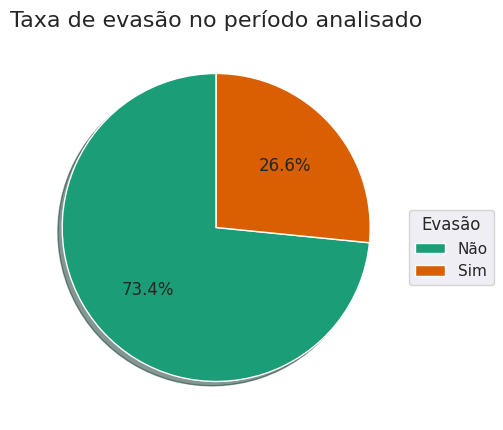

In [267]:
#cores = ['royalblue', 'orange', 'forestgreen', 'orchid', 'purple', 'brown', 'slateblue',
         #'gray', 'olive', 'navy', 'teal', 'tomato']

#cores2 = [#1B9E77 (verde-escuro), #D95F02 (laranja), #7570B3 (roxo-escuro), #E7298A (rosa-escuro), #66A61E (verde-oliva), #E6AB02 (amarelo-escuro), #A6761D (marrom), #666666 (cinza]

cont_clientes_evasao = df['Churn'].value_counts()

fig, ax = plt.subplots(figsize=(8,5))

ax.pie(cont_clientes_evasao, autopct='%1.1f%%', startangle=90, shadow=True, colors=['#1B9E77', '#D95F02'])
ax.set_title('Taxa de evasão no período analisado', fontsize=16, loc='center')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels = ['Não', 'Sim'], title='Evasão', loc = [1.0,0.35])
#ax.legend(labels = cont_clientes_evasao.index, loc = [1.2,0.35])
fig.savefig('taxa_cancelamento_periodo.png', transparent=False, dpi=300, bbox_inches='tight')

plt.show()

In [268]:
genero_evasao = df.groupby(['customer_gender', 'Churn']).size().reset_index(name='contagem')
internet_evasao = df.groupby(['internet_InternetService', 'Churn']).size().reset_index(name='contagem')
tipo_contrato_evasao = df.groupby(['account_Contract', 'Churn']).size().reset_index(name='contagem')
tipo_pagamento_evasao = df.groupby(['account_PaymentMethod', 'Churn']).size().reset_index(name='contagem')

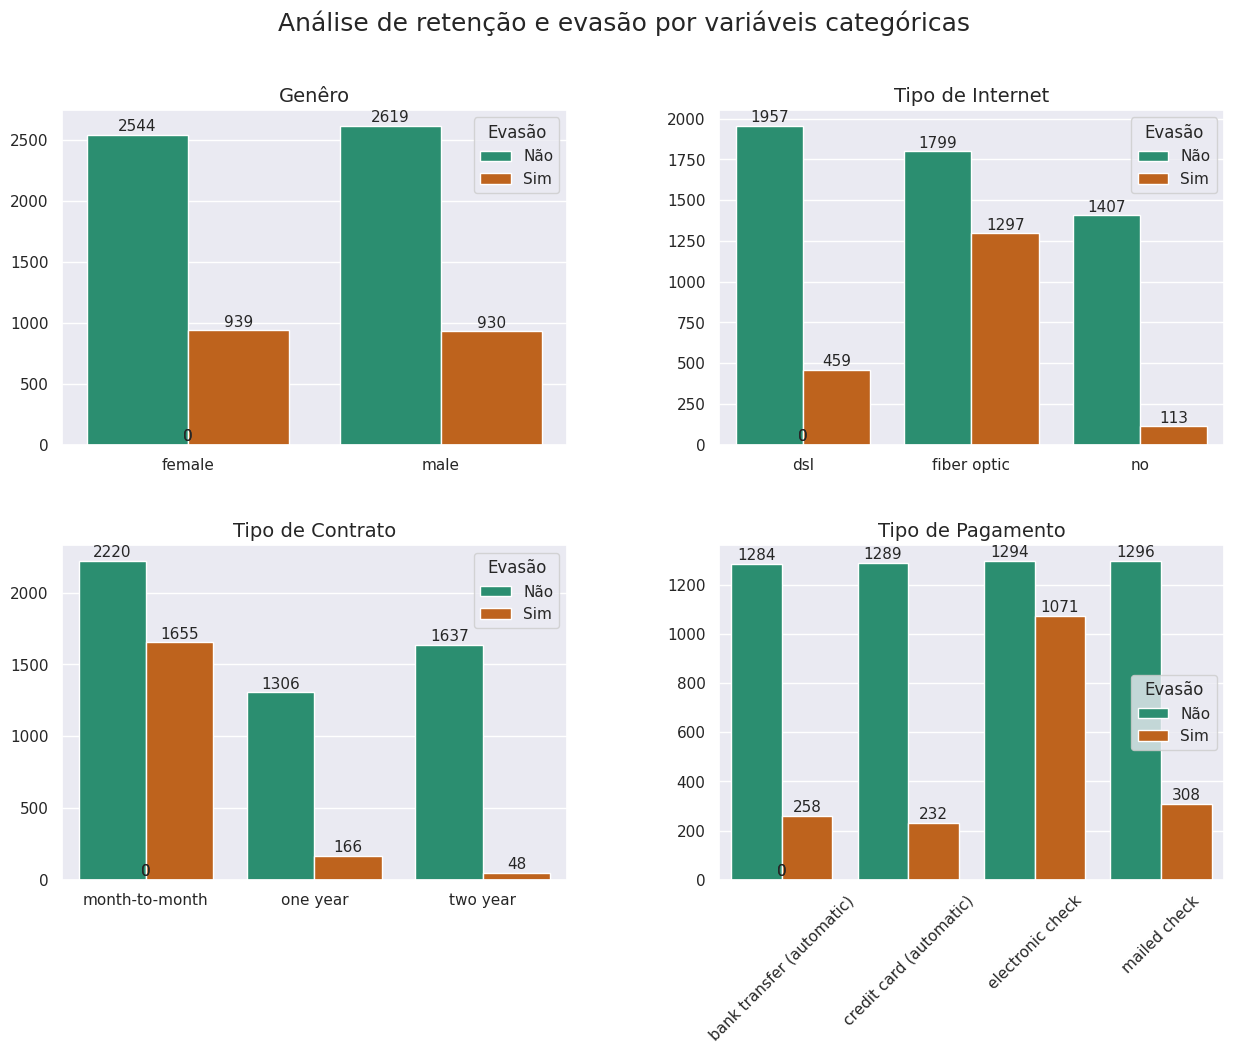

In [269]:
sns.set_theme()
sns.set_palette('Dark2')

fig, axs = plt.subplots(2,2, figsize=(15,10))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
fig.suptitle('Análise de retenção e evasão por variáveis categóricas', fontsize=18)

sns.barplot(data=genero_evasao, x='customer_gender', y='contagem', hue='Churn' , ax=axs[0,0])
axs[0,0].set_title('Genêro', fontsize=14)

sns.barplot(data=internet_evasao, x='internet_InternetService', y='contagem', hue='Churn', ax=axs[0,1])
axs[0,1].set_title('Tipo de Internet', fontsize=14)

sns.barplot(data=tipo_contrato_evasao, x='account_Contract', y='contagem', hue='Churn', ax=axs[1,0])
axs[1,0].set_title('Tipo de Contrato', fontsize=14)

sns.barplot(data=tipo_pagamento_evasao, x='account_PaymentMethod', y='contagem', hue='Churn', ax=axs[1,1])
axs[1,1].set_title('Tipo de Pagamento', fontsize=14)
axs[1,1].tick_params(axis='x', rotation=45)

for i in range(2):
  for j in range(2):
    for p in axs[i,j].patches:
      height = p.get_height()
      if not pd.isna(height):
          axs[i,j].text(
              p.get_x() + p.get_width() / 2., height + 5,
              f'{int(height)}', ha='center', va='bottom', fontsize=11)

      axs[i,j].set_xlabel('')
      axs[i,j].set_ylabel('')
      handles, labels = axs[i,j].get_legend_handles_labels()
      axs[i,j].legend(handles, ['Não', 'Sim'], title='Evasão')
      extent = axs[i, j].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
      fig.savefig(f'categoricas_{i}_{j}.png', bbox_inches=extent, dpi=300)

fig.savefig('analise_de_evasão_variaveis_categoricas.png', transparent=False, dpi=300, bbox_inches='tight')

plt.show()

In [270]:
tempo_contrato = df.groupby(['escala_customer_tenure', 'Churn']).size().reset_index(name='contagem')
gasto_mensal = df.groupby(['escala_account_Charges_Monthly', 'Churn']).size().reset_index(name='contagem')
gasto_total = df.groupby(['escala_account_Charges_Total', 'Churn']).size().reset_index(name='contagem')
gasto_diário = df.groupby(['escala_Contas_Diarias', 'Churn']).size().reset_index(name='contagem')

/tmp/ipython-input-270-2056450147.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tempo_contrato = df.groupby(['escala_customer_tenure', 'Churn']).size().reset_index(name='contagem')
/tmp/ipython-input-270-2056450147.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gasto_mensal = df.groupby(['escala_account_Charges_Monthly', 'Churn']).size().reset_index(name='contagem')
/tmp/ipython-input-270-2056450147.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the f

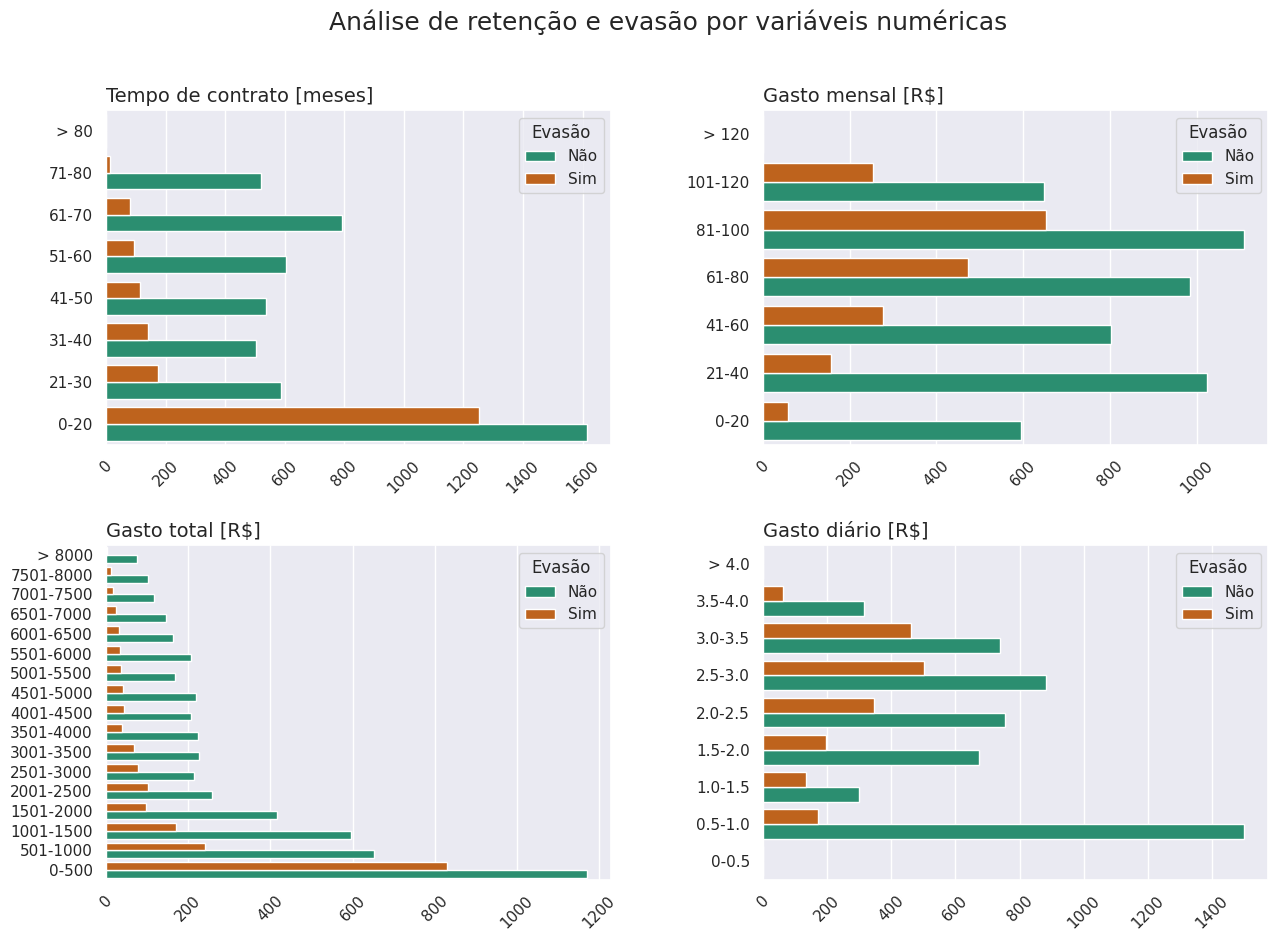

In [271]:
fig, axs = plt.subplots(2,2, figsize=(15,10))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
fig.suptitle('Análise de retenção e evasão por variáveis numéricas', fontsize=18)

sns.barplot(data=tempo_contrato, y='escala_customer_tenure', x='contagem', hue='Churn', orient='h' , ax=axs[0,0])
axs[0,0].set_title('Tempo de contrato [meses]', fontsize=14, loc='left')

sns.barplot(data=gasto_mensal, y='escala_account_Charges_Monthly', x='contagem', hue='Churn', ax=axs[0,1])
axs[0,1].set_title('Gasto mensal [R$]', fontsize=14, loc='left')

sns.barplot(data=gasto_total, y='escala_account_Charges_Total', x='contagem', hue='Churn', ax=axs[1,0])
axs[1,0].set_title('Gasto total [R$]', fontsize=14, loc='left')

sns.barplot(data=gasto_diário, y='escala_Contas_Diarias', x='contagem', hue='Churn', ax=axs[1,1])
axs[1,1].set_title('Gasto diário [R$]', fontsize=14, loc='left')


for i in range(2):
  for j in range(2):
      axs[i,j].set_xlabel('')
      axs[i,j].set_ylabel('')
      handles, labels = axs[i,j].get_legend_handles_labels()
      axs[i,j].legend(handles, ['Não', 'Sim'], title='Evasão')
      axs[i,j].tick_params(axis='x', rotation=45)
      axs[i,j].invert_yaxis()
      extent = axs[i, j].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
      fig.savefig(f'numericas_{i}_{j}.png', bbox_inches=extent, dpi=300)
fig.savefig('analise_de_evasão_variaveis_numericas.png', transparent=False, dpi=300, bbox_inches='tight')

plt.show()

#📄Relatorio Final

# **Relatório Final - Análise de Evasão de Clientes (Churn) - TelecomX**

## **1. Introdução**
O objetivo desta análise é entender os fatores que influenciam a **evasão de clientes (Churn)** em uma empresa de telecomunicações.  
O problema de Churn é crítico para o negócio, pois a perda constante de clientes reduz a receita e aumenta custos com aquisição de novos consumidores.  
A partir dos dados disponibilizados, buscamos **identificar padrões de comportamento** que levam à evasão e, com isso, gerar **insights para retenção de clientes**.

---

## **2. Limpeza e Tratamento de Dados**
As seguintes etapas foram realizadas:

- **Importação dos dados**: carregamento do dataset `TelecomX_BR`.
- **Verificação de valores ausentes**: tratamento de `NaN` com substituição por valores médios ou exclusão, dependendo do impacto na amostra.
- **Conversão de tipos**: transformação de variáveis como `TotalCharges` para tipo numérico.
- **Criação de variáveis derivadas** (quando necessário): por exemplo, categorização de clientes por tempo de contrato.
- **Codificação de variáveis categóricas**: uso de *Label Encoding* ou *One-Hot Encoding* para variáveis como `InternetService`, `Contract` e `PaymentMethod`.

---

## **3. Análise Exploratória de Dados (EDA)**

### **3.1 Distribuição do Churn**
A maioria dos clientes permanece ativa, mas **aproximadamente 26,6% cancelaram** conforme demonstrado abaixo:

<img src="https://raw.githubusercontent.com/RafaelRReis/TelecomX_BR/main/taxa_cancelamento_periodo.png" width="400" height="300" />

### **3.2 Perfil dos clientes que mais cancelam**
- **Tipo de contrato**: Clientes com **contrato mensal** apresentaram maior taxa de evasão.
- **Serviços adicionais**: Clientes sem serviços adicionais de internet ou com **internet via fibra óptica** cancelaram mais.
- **Forma de pagamento**: Usuários com **pagamento eletrônico (Electronic Check)** apresentaram maior churn.
- **Tempo de permanência**: Clientes recentes (< 1 ano) tiveram maior probabilidade de evasão.

### **3.3 Visualizações**
(As figuras abaixo foram geradas no notebook)

- **Distribuição Churn vs Tipo de Contrato e Boxplot do Tempo de Permanência vs Churn**

<img src="https://raw.githubusercontent.com/RafaelRReis/TelecomX_BR/main/analise_de_evas%C3%A3o_variaveis_categoricas.png" width="1000" />

- **Correlação entre variáveis numéricas e Churn**

<img src="https://raw.githubusercontent.com/RafaelRReis/TelecomX_BR/main/analise_de_evas%C3%A3o_variaveis_numericas.png" width="1000" />

---

## **4. Conclusões e Insights**
- **Contratos mensais** e **pagamento eletrônico** são os principais preditores de evasão.
- Clientes mais antigos e com **serviços adicionais** tendem a ser mais fiéis.
- **Suporte ao cliente e ofertas de fidelização** podem reduzir significativamente o churn.

---

## **5. Recomendações**
1. **Oferecer descontos ou benefícios** para clientes com contrato mensal, incentivando a migração para contratos anuais.
2. **Campanhas de retenção direcionadas** para clientes com menos de 1 ano de contrato.
3. **Melhorar a experiência de pagamento eletrônico**, reduzindo problemas que possam gerar insatisfação.
4. **Criar pacotes combinados** de serviços para aumentar o engajamento do cliente.
5. **Monitorar métricas de churn em tempo real** para ações preventivas.

---

  
